In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv(r"C:\Users\HP\Desktop\MSIT_ML_CLASS-master-1\MSIT_ML_CLASS-master\datasets\boston_housing.csv")
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
clean_data=data[["RM","MEDV"]].values
clean_data


array([[6.5750e+00, 5.0400e+05],
       [6.4210e+00, 4.5360e+05],
       [7.1850e+00, 7.2870e+05],
       [6.9980e+00, 7.0140e+05],
       [7.1470e+00, 7.6020e+05],
       [6.4300e+00, 6.0270e+05],
       [6.0120e+00, 4.8090e+05],
       [6.1720e+00, 5.6910e+05],
       [5.6310e+00, 3.4650e+05],
       [6.0040e+00, 3.9690e+05],
       [6.3770e+00, 3.1500e+05],
       [6.0090e+00, 3.9690e+05],
       [5.8890e+00, 4.5570e+05],
       [5.9490e+00, 4.2840e+05],
       [6.0960e+00, 3.8220e+05],
       [5.8340e+00, 4.1790e+05],
       [5.9350e+00, 4.8510e+05],
       [5.9900e+00, 3.6750e+05],
       [5.4560e+00, 4.2420e+05],
       [5.7270e+00, 3.8220e+05],
       [5.5700e+00, 2.8560e+05],
       [5.9650e+00, 4.1160e+05],
       [6.1420e+00, 3.1920e+05],
       [5.8130e+00, 3.0450e+05],
       [5.9240e+00, 3.2760e+05],
       [5.5990e+00, 2.9190e+05],
       [5.8130e+00, 3.4860e+05],
       [6.0470e+00, 3.1080e+05],
       [6.4950e+00, 3.8640e+05],
       [6.6740e+00, 4.4100e+05],
       [5.

In [4]:
data.keys()

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

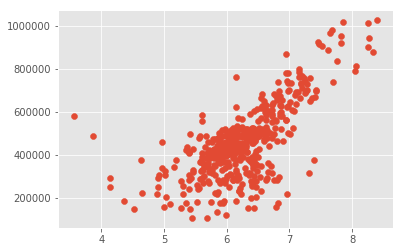

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.scatter(clean_data[:,0],clean_data[:,1])
plt.show()

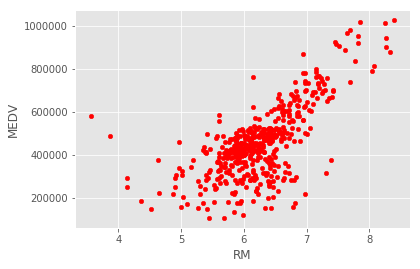

In [6]:
data.plot(kind="scatter",x="RM",y="MEDV",c="r")

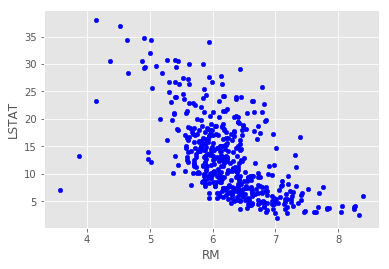

In [7]:
data.plot(kind="scatter",x="RM",y="LSTAT",c="b")

# function to calculate error

In [8]:
def compute_errors(m,b,points):
    total_error=0
    for point in points:
        x=point[0]
        y=point[1]
        
        total_error+=(y-((m*x)+b))**2
    return total_error/len(points)
compute_errors(0,0,clean_data)


233709014171.77914

# code to do the calculations

In [9]:
def step_gradient(b_current,m_current,points,learningrate):
    b_gradient=0
    m_gradient=0
    N=float(len(points))
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1]
        b_gradient+=-(2/N)*(1)*(y-((m_current*x)+b_current))
        m_gradient+=-(2/N)*(x)*(y-((m_current*x)+b_current))
    new_b=b_current-(b_gradient*learningrate)
    new_m=m_current-(m_gradient*learningrate)
    return[new_b,new_m]
             

In [10]:
points=clean_data
b_initial=0
m_initial=0
# hyper parameters
learning_rate=.01
num_iterations=10000

b=b_initial
m=m_initial
first_error=compute_errors(m,b,points)

print("We are starting at b=",b_initial,"m=",m_initial,"start error",first_error)

error_list=[]
for i in range(num_iterations):
    b,m=step_gradient(b,m,points,learning_rate,)
    error_list.append(compute_errors(m,b,points))

print("Ending at b=",b,"m=",m,"error =",error_list[-1])



We are starting at b= 0 m= 0 start error 233709014171.77914
Ending at b= -576402.8476699291 m= 165318.6628652915 error = 14099244123.349504


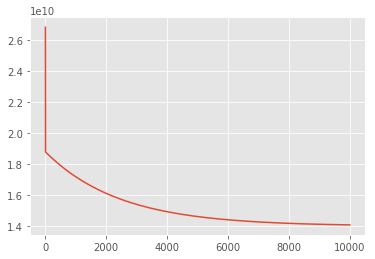

In [11]:
plt.plot(error_list)

[1 2 3 4 5 6 7 8 9]
[-411084.18480464 -245765.52193935  -80446.85907405   84871.80379124
  250190.46665653  415509.12952182  580827.79238711  746146.4552524
  911465.11811769]


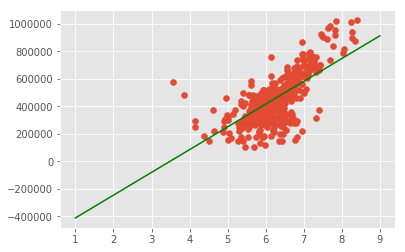

In [12]:
x=np.arange(1,10)
y=m*x+b
print(x)
print(y)
plt.scatter(clean_data[:,0],clean_data[:,1])
plt.plot(x,y,c='g')

# how good is our model

### since we dont test the model on new data or test data ,therefore we cant predict the accuracy of model.
### By knowing the accuracy we can judge about the goodness of our model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data[:,0],clean_data[:,1],test_size=0.3,random_state= 24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(342,)
(147,)
(342,)
(147,)


# train

In [17]:

points=np.zeros((X_train.shape[0],2))
points[:,0]=X_train
points[:,1]=y_train

learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations=10000

b=b_initial
m=m_initial
first_error=compute_errors(m,b,points)
print("We are starting at b =",initial_b,"m=",initial_m,"start error =",first_error)

error_list=[]
for i in range(num_iterations):
    b,m = step_gradient(b,m,points,learning_rate)
    error_list.append(compute_errors(m,b,points))
print("Ending at b = ",b,"m =",m,"error =",error_list[-1])    
    


We are starting at b = 0 m= 0 start error = 235702417631.57895
Ending at b =  -107912.06990691515 m = 91318.39964826993 error = 17168520262.263208


# test

In [18]:
points_test=np.zeros((X_test.shape[0],2))
points_test[:,0]=X_test
points_test[:,1]=y_test

predictions=[]

for point in points_test:
    y_predicted=m*point[0]+b
    predictions.append(y_predicted)
print(predictions)    
    

[506386.80452699674, 470589.9918648749, 450956.5359404969, 456892.2319176343, 269963.4678376258, 420182.23525902984, 446573.25275737984, 474334.046250454, 461001.5599018066, 489766.85579101153, 496433.09896533523, 413424.67368505785, 531134.0908316777, 527390.0364460988, 478078.10063603305, 445386.1135619524, 479265.23983146047, 481822.155021612, 450408.6255426072, 513053.0477013203, 486844.6670022669, 492506.4077804597, 491410.58698468044, 435432.4080002909, 452508.9487345175, 508487.1277189069, 478899.9662328675, 484744.34381035675, 476890.9614406055, 479813.15022935014, 441094.1487784837, 569670.4554832476, 531955.9564285122, 445842.7055601937, 434153.9504052152, 437441.4127925529, 520267.2012735337, 496524.4173649835, 304755.77810361667, 439085.1439862218, 417990.5936674714, 397626.59054590727, 415068.4048787268, 426300.568035464, 501546.9293456383, 341922.3667604626, 452965.54073275876, 609211.3225309486, 426391.8864351123, 474334.046250454, 593961.1497896875, 474699.31984904705, 

# score

In [19]:
predictions - y_test

array([-7.11131955e+04,  9.04899919e+04,  1.83565359e+04,  1.50292232e+05,
       -1.98365322e+04, -5.23177647e+04,  1.42073253e+05,  1.02634046e+05,
        3.89015599e+04,  2.60866856e+05, -1.35666901e+05,  6.02467369e+03,
       -1.70265909e+05, -9.42099636e+04,  2.05078101e+05,  1.27861136e+04,
       -1.23434760e+05,  7.86221550e+04,  4.93086255e+04, -1.40046952e+05,
        6.26446670e+04, -1.14935922e+04, -1.91089413e+05,  1.58232408e+05,
        4.72089487e+04,  1.07871277e+04, -2.09000338e+04,  3.84434381e+03,
        2.22790961e+05,  1.79513150e+05, -3.98058512e+04, -1.31729545e+05,
        3.63559564e+04, -6.65572944e+04,  1.50653950e+05,  1.11414128e+04,
       -5.72327987e+04, -5.37558264e+03,  1.57755778e+05,  7.15851440e+04,
        9.05936675e+01,  1.60326591e+05,  3.28684049e+04, -1.46994320e+04,
        6.05469293e+04,  3.53223668e+04,  1.33765541e+05, -4.09288677e+05,
        1.68918864e+04, -1.07659537e+04, -3.86738850e+05,  2.75199320e+05,
        3.66150448e+04,  

# Now use metod of r**2 for calculation of accuracy

# another method for all these things we have done yet

In [21]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
lr.predict(X_test.reshape(-1,1))
r2=lr.score(X_test.reshape(-1,1),y_test.reshape(-1,1))
print(r2)

print(lr.coef_)
print(lr.intercept_)
print(dir(lr))


0.5221738820372132
[[174195.44363561]]
[-630823.01221526]
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_residues', '_set_intercept', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [24]:
X=data[["RM","LSTAT","PTRATIO"]].values
y=data["MEDV"].values

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
print(lr.score(X_test,y_test))
print(lr.coef_)
print(lr.intercept_)

0.6315493425383234
[ 80542.70502707 -12074.89153223 -19153.5225713 ]
465488.93762001826
